<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Definition-of-Dynamical-System-with-Numba" data-toc-modified-id="Definition-of-Dynamical-System-with-Numba-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definition of Dynamical System with Numba</a></span></li><li><span><a href="#Define-parameters,-temporal-interval-and-initial-conditions:" data-toc-modified-id="Define-parameters,-temporal-interval-and-initial-conditions:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define parameters, temporal interval and initial conditions:</a></span></li><li><span><a href="#Evaluate-the-Lyapunov-Spectrum" data-toc-modified-id="Evaluate-the-Lyapunov-Spectrum-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluate the Lyapunov Spectrum</a></span></li><li><span><a href="#Definition-of-Dynamical-System-just-in-Python" data-toc-modified-id="Definition-of-Dynamical-System-just-in-Python-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Definition of Dynamical System just in Python</a></span></li><li><span><a href="#Define-parameters,-temporal-interval-and-initial-conditions:" data-toc-modified-id="Define-parameters,-temporal-interval-and-initial-conditions:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define parameters, temporal interval and initial conditions:</a></span></li><li><span><a href="#Evaluate-the-Lyapunov-Spectrum" data-toc-modified-id="Evaluate-the-Lyapunov-Spectrum-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluate the Lyapunov Spectrum</a></span></li></ul></div>

## Import Packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from numba import njit

In [2]:
# Python Version
import evaLEs.LE as ly
# Python + Numba Version
import evaLEs.numbaLE as nly

## Definition of Dynamical System with Numba

You can use the @njit decorator for numbaLE

In [8]:
@njit
def ODE(t, val, p):
    """
    Define the increment of the Dyn. Syst. in the scipy.integrate.ode way
    """
    x = val[0]
    y = val[1]
    diff = [x*p[0] - y, y*p[1] - x] 
    return np.array(diff)

@njit
def J(t, val, p):
    """
    The Jacobian of the system (evaluated by you)
    """
    D = len(val)
    J = - np.ones((D,D)) + np.eye(D) * ( p + 1 )
    return J

## Define parameters, temporal interval and initial conditions:

In [4]:
p = np.array([-0.01, -0.03], dtype=np.float64)

init = np.array([0.1, 0.1], dtype=np.float64)

ttrans = np.arange(0.0, 100, 0.1, dtype=np.float64)
#ttrans = None
t = np.arange(0.0, 100, 0.01, dtype=np.float64)

## Evaluate the Lyapunov Spectrum

In [5]:
start = time.time()
LE = nly.computeLE(ODE, J, init, t, p, ttrans)
print(f'Exec Time: {time.time()-start}')
print(f'The LEs are: {LE[-1]}')

Exec Time: 5.160209894180298
The LEs are: [ 0.97663367 -1.01663367]


Note that the first execution will be slower than the second: let's try another time!

In [6]:
start = time.time()
LE = nly.computeLE(ODE, J, init, t, p, ttrans)
print(f'Exec Time: {time.time()-start}')
print(f'The LEs are: {LE[-1]}')

Exec Time: 0.0518031120300293
The LEs are: [ 0.97663367 -1.01663367]


You can osserve the convergence of the LEs during the algorithm:

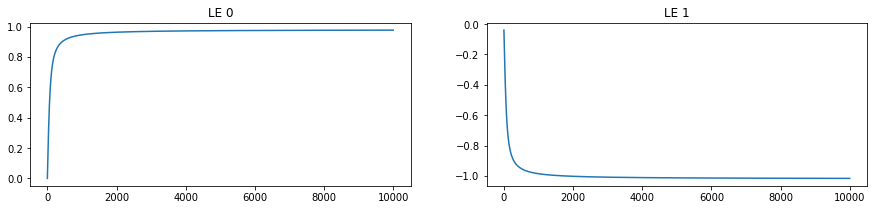

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
for i, (ax, le) in enumerate(zip(axs.flat, LE.T)):
    ax.plot(le)
    ax.set_title(f'LE {i}')

## Definition of Dynamical System just in Python

In [9]:
def ODE(t, val, p):
    """
    Define the increment of the Dyn. Syst. in the scipy.integrate.ode way
    """
    x = val[0]
    y = val[1]
    diff = [x*p[0] - y, y*p[1] - x] 
    return np.array(diff)

def J(t, val, p):
    """
    The Jacobian of the system (evaluated by you)
    """
    D = len(val)
    J = - np.ones((D,D)) + np.eye(D) * ( p + 1 )
    return J

## Evaluate the Lyapunov Spectrum

In [10]:
start = time.time()
LE = ly.computeLE(ODE, J, init, t, p, ttrans)
print(f'Exec Time: {time.time()-start}')
print(f'The LEs are: {LE[-1]}')

Exec Time: 1.3613581657409668
The LEs are: [ 0.97663367 -1.01663367]


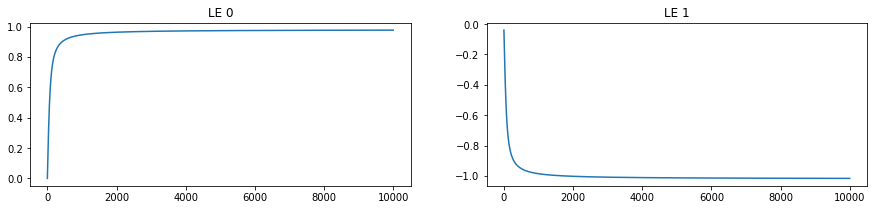

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))
for i, (ax, le) in enumerate(zip(axs.flat, LE.T)):
    ax.plot(le)
    ax.set_title(f'LE {i}')